- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

# LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.utils import shuffle

# DATASET

In [3]:
with open("./traffic-signs-data/train.p", mode = "rb") as training_data:
    train= pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode = "rb") as validation_data:
    valid= pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode = "rb") as test_data:
    test= pickle.load(test_data)

In [4]:
X_train, y_train = train["features"], train["labels"]
X_valid, y_valid = valid["features"], valid["labels"]
X_test, y_test = test["features"], test["labels"]

In [5]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


# EDA

41

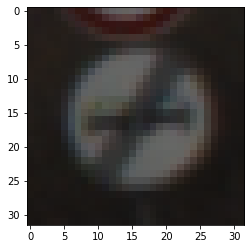

In [6]:
i = 16
plt.imshow(X_train[i])
y_train[i]

41

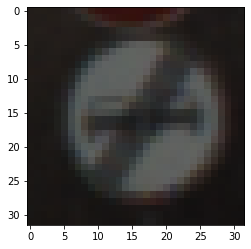

In [7]:
i = 22
plt.imshow(X_train[i])
y_train[i]

26

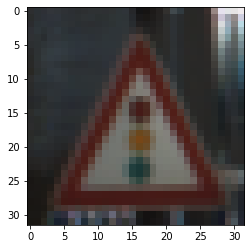

In [8]:
i = 1616
plt.imshow(X_train[i])
y_train[i]

# DATA PREP

In [9]:
X_train, y_train =shuffle(X_train, y_train)
X_train_gray = np.sum(X_train/3, axis= 3, keepdims= True)
X_test_gray= np.sum(X_test/3, axis = 3 , keepdims= True)
X_valid_gray= np.sum(X_valid/3, axis=3, keepdims=True)

In [10]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm= (X_test_gray - 128) / 128
X_valid_gray_norm= (X_valid_gray - 128) / 128

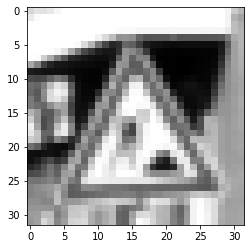

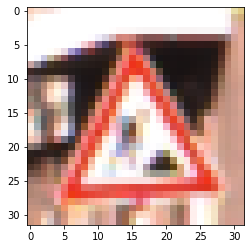

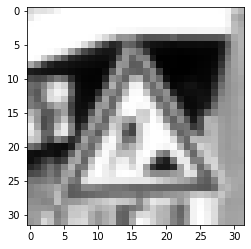

In [11]:
i=222
plt.imshow(X_train_gray[i].squeeze(), cmap= 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap= 'gray')

# MODEL

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [15]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size= (5,5), activation= "relu", input_shape= (32,32,1)))
model.add(AveragePooling2D())
model.add(Conv2D(filters= 16, kernel_size= (5,5), activation= "relu"))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(units=120, activation= 'relu'))
model.add(Dense(units= 84, activation = 'relu'))
model.add(Dense(units= 43, activation = 'softmax'))

In [16]:
model.compile(loss= 'sparse_categorical_crossentropy', optimizer= Adam(lr= 0.001), metrics= ["accuracy"])

In [18]:
model_hist= model.fit(X_train_gray_norm,
                     y_train,
                     batch_size= 500,
                     nb_epoch= 10,
                     verbose= 1,
                     validation_data= (X_valid_gray_norm, y_valid))

C:\Users\tripl\Anaconda3\envs\ds\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 7s 211us/step - loss: 3.1572 - accuracy: 0.1758 - val_loss: 2.5698 - val_accuracy: 0.3372
Epoch 2/10
34799/34799 [==============================] - 6s 185us/step - loss: 1.5860 - accuracy: 0.5593 - val_loss: 1.4017 - val_accuracy: 0.5846
Epoch 3/10
34799/34799 [==============================] - 6s 185us/step - loss: 0.9186 - accuracy: 0.7413 - val_loss: 1.0593 - val_accuracy: 0.6977
Epoch 4/10
34799/34799 [==============================] - 6s 185us/step - loss: 0.6725 - accuracy: 0.8163 - val_loss: 0.8595 - val_accuracy: 0.7574
Epoch 5/10
34799/34799 [==============================] - 7s 188us/step - loss: 0.5345 - accuracy: 0.8562 - val_loss: 0.8624 - val_accuracy: 0.7449
Epoch 6/10
34799/34799 [==============================] - 7s 188us/step - loss: 0.4418 - accuracy: 0.8825 - val_loss: 0.7099 - val_accuracy: 0.7905
Epoch 7/10
34799/34799 [==============================] - 6s 18

# EVALUATION

In [19]:
score = model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy : {}'.format(score[1]))

12630/12630 [==============================] - 2s 129us/step
Test Accuracy : 0.8322248458862305


In [20]:
model_hist.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [22]:
accuracy= model_hist.history['accuracy']
val_accuracy = model_hist.history['val_accuracy']
loss= model_hist.history['loss']
val_loss = model_hist.history['val_loss']

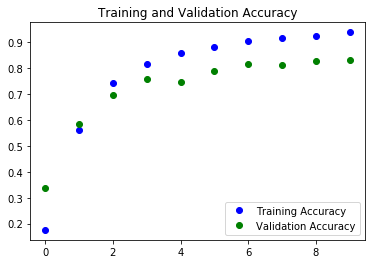

In [23]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'go', label= 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

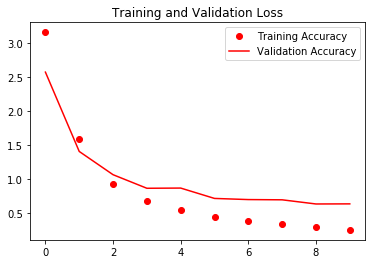

In [24]:
epochs = range(len(loss))
plt.plot(epochs, loss, 'ro', label='Training Accuracy')
plt.plot(epochs, val_loss, 'red', label= 'Validation Accuracy')
plt.title('Training and Validation Loss')
plt.legend()

In [29]:
pred_classes = model.predict_classes(X_test_gray_norm)
y_true = y_test

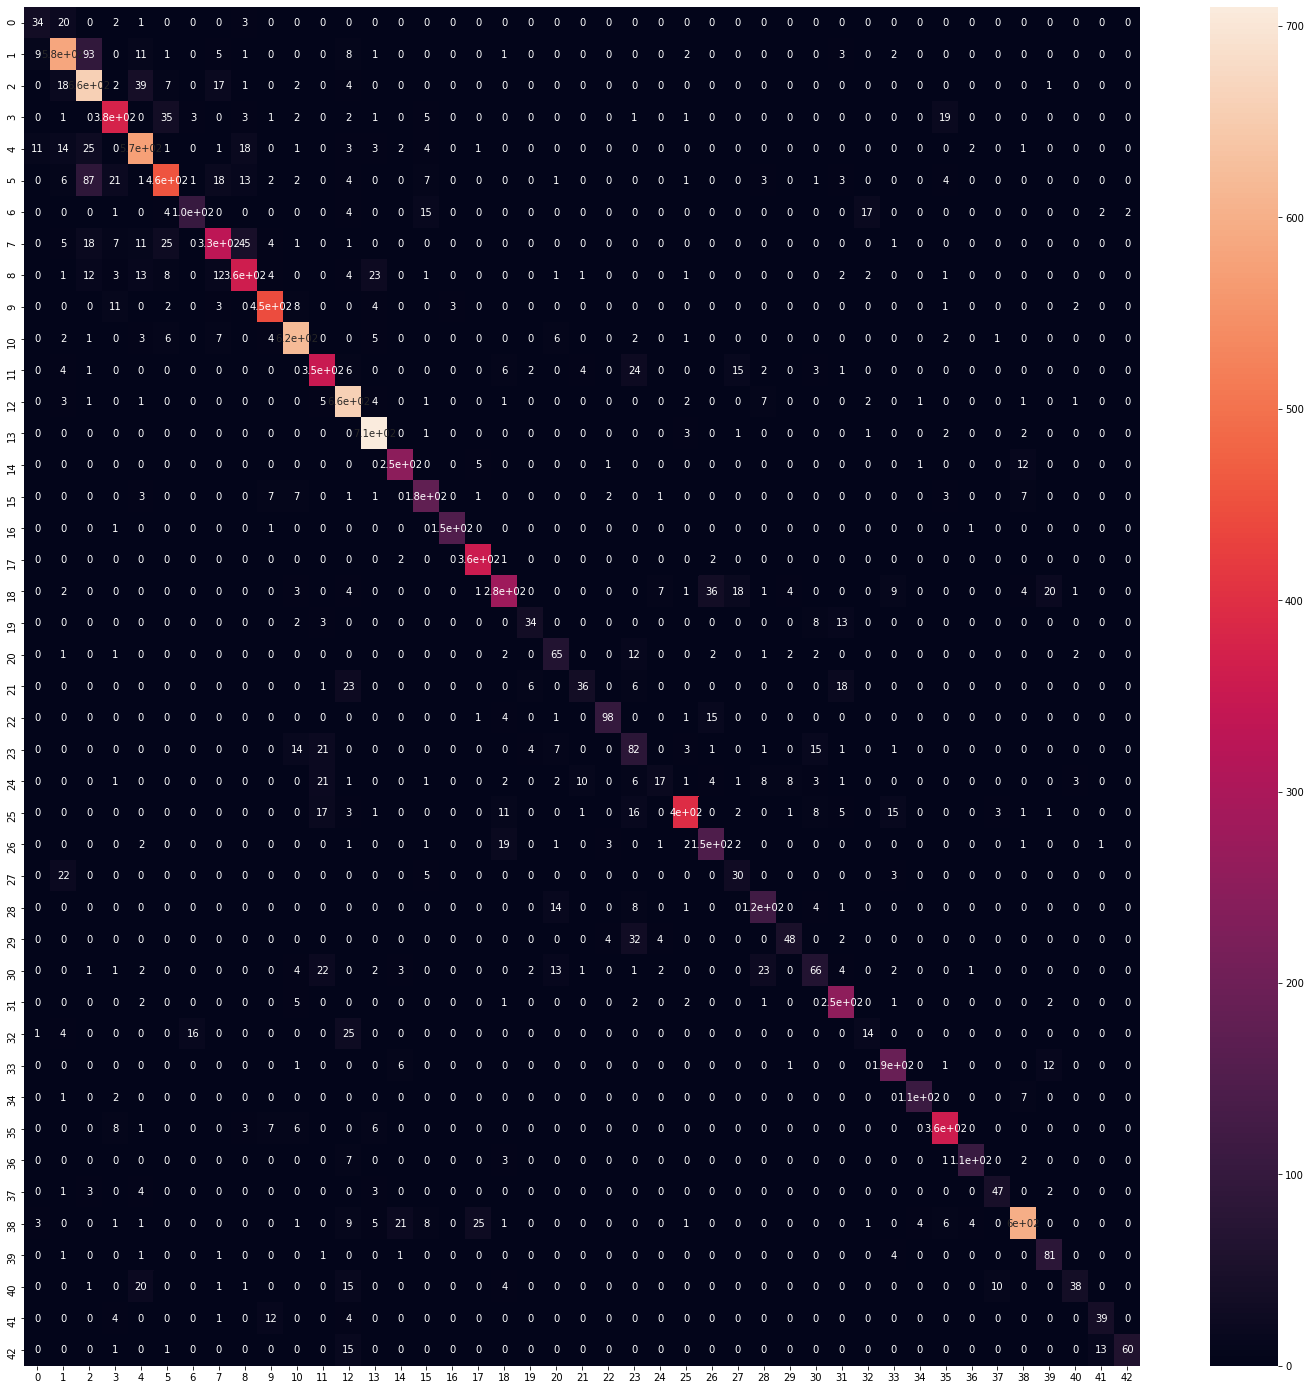

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, pred_classes)
plt.figure(figsize= (25,25))
sns.heatmap(cm, annot= True)

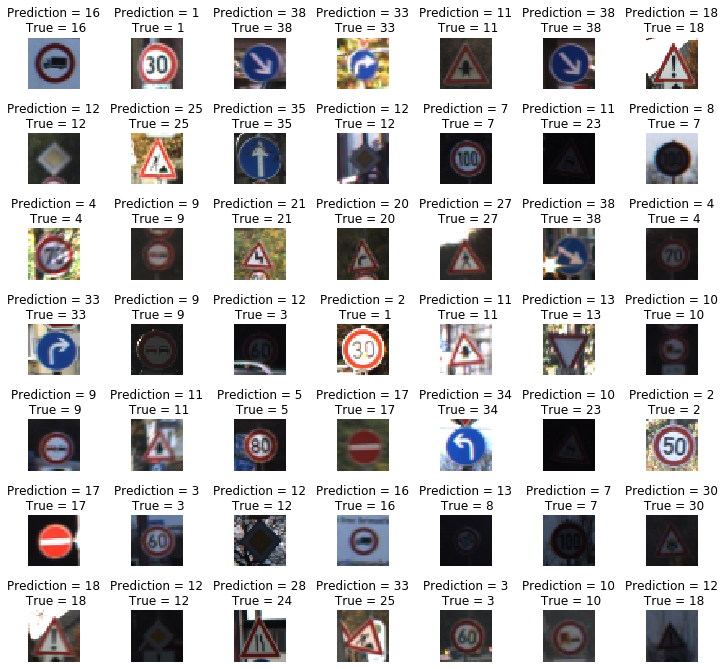

In [32]:
L = 7
W=7
fig, axes = plt.subplots( L, W, figsize= (12,12))
axes = axes.ravel()
for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(pred_classes[i], y_true[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=1)